https://www.kaggle.com/datasets/salader/dogsvscats

In [5]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/

 # google colab connects with kaggle

In [6]:
!kaggle datasets download -d salader/dogsvscats
#api command from kaggle dataset

100% 1.06G/1.06G [01:01<00:00, 22.6MB/s]
100% 1.06G/1.06G [01:01<00:00, 18.5MB/s]


In [7]:
import zipfile
zip_file = zipfile.ZipFile('/content/dogsvscats.zip')
zip_file.extractall('/content')
zip_file.close()

#unzip the catsvsdogs file(we can see train and test data)

## VGG-16

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,MaxPooling2D,Flatten,Conv2D

In [12]:
# Generators dataset

train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',labels = 'inferred', #already cats and dogs are labelled, so follow the same
    label_mode ='int', #labelling will happen alphabetic order(cat-0,dog-1)
    batch_size =32,image_size =(224,224)) # irresptive of each image size, it will consider all image sizes as 224,224

val_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',labels = 'inferred', #already cats and dogs are labelled, so follow the same
    label_mode ='int', #labelling will happen alphabetic order(cat-0,dog-1)
    batch_size =32,image_size =(224,224)) # irresptive of image size, it will consider all image sizes as 224,224



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalization

def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label

In [14]:
train_ds =train_ds.map(process)
val_ds = val_ds.map(process)

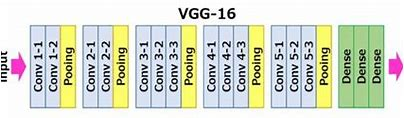

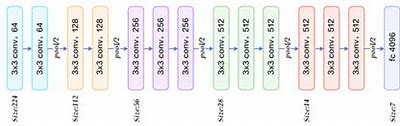

In [15]:
model = Sequential()

#block 1
model.add(Conv2D(64, kernel_size =(3,3),activation ='relu',input_shape =(224,224,3)))
model.add(Conv2D(64,kernel_size =(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 2
model.add(Conv2D(128, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(128,kernel_size =(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 3
model.add(Conv2D(256, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(256,kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(256,kernel_size =(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 4
model.add(Conv2D(512, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 5
model.add(Conv2D(512, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#Flatten
model.add(Flatten())

# FC 1
model.add(Dense(4096, activation ='relu'))
model.add(Dropout(0.3))

# FC 2
model.add(Dense(4096, activation ='relu'))
model.add(Dropout(0.3))

# Output
model.add(Dense(1, activation ='sigmoid'))

#summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 128)       0         
 g2D)                                                   

In [16]:
# With Batch Normalisation

model = Sequential()

#block 1
model.add(Conv2D(64, kernel_size =(3,3),activation ='relu',input_shape =(224,224,3)))
model.add(Conv2D(64,kernel_size =(3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 2
model.add(Conv2D(128, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(128,kernel_size =(3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 3
model.add(Conv2D(256, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(256,kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(256,kernel_size =(3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 4
model.add(Conv2D(512, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#block 5
model.add(Conv2D(512, kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(Conv2D(512,kernel_size =(3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2))

#Flatten
model.add(Flatten())

# FC 1
model.add(Dense(4096, activation ='relu'))

# FC 2
model.add(Dense(4096, activation ='relu'))

# Output
model.add(Dense(1, activation ='sigmoid'))

#summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 220, 220, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 128)    

In [17]:
model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics =['accuracy'] )

In [18]:
history = model.fit(train_ds, epochs =2,validation_data =val_ds)

Epoch 1/2
625/625 [==============================] - 279s 405ms/step - loss: 0.7212 - accuracy: 0.5368 - val_loss: 0.7148 - val_accuracy: 0.5454
Epoch 2/2
625/625 [==============================] - 256s 409ms/step - loss: 0.6820 - accuracy: 0.5716 - val_loss: 0.6848 - val_accuracy: 0.5630


# Tranfer Learning

we are importing the existing models and building model with very short coding

In [19]:
from keras.applications.vgg16 import VGG16

In [21]:
conv_base =VGG16(
    include_top=False, # it includes all the top layers same as vgg16
    weights="imagenet",
    input_shape=(224,224,3))

58889256/58889256 [==============================] - 3s 0us/step


In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
model =Sequential()
model.add(conv_base)  # importing the CNN -VGG16 part from above
model.add(Flatten())   # Flatten 2d to 1d
model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation ='sigmoid'))
model.compile(optimizer ='adam',loss ='binary_crossentropy',metrics =['accuracy'])
history =model.fit(train_ds,epochs =5,validation_data =val_ds)

Epoch 1/5
625/625 [==============================] - 268s 405ms/step - loss: 1.2616 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 251s 401ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 253s 404ms/step - loss: 0.6932 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 251s 401ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 253s 404ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.5000
